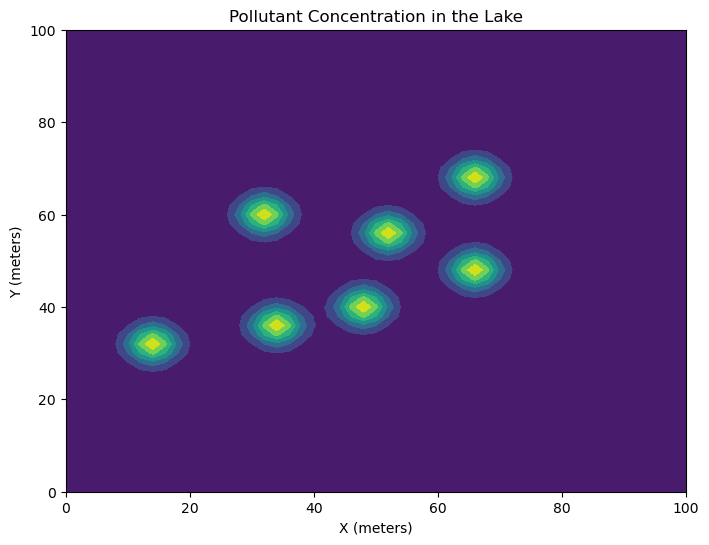

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class DiffusionSimulation:
    def __init__(self, master):
        self.master = master
        master.title("Pollutant Diffusion Simulation")

        # Constants and parameters
        self.L = 100  # Length of the lake in meters
        self.T = 10  # Total time to simulate
        self.Nx = 51  # Number of grid points along x-axis
        self.Ny = 51  # Number of grid points along y-axis
        self.dx = self.L / (self.Nx - 1)  # Grid spacing
        self.dy = self.L / (self.Ny - 1)  # Grid spacing
        self.Dt = 0.1  # Time step
        self.D = 0.1  # Diffusion coefficient

        # Initial concentration setup
        self.C = np.zeros((self.Nx, self.Ny))  # Concentration matrix

        # Create GUI elements
        self.fig, self.ax = plt.subplots(figsize=(8, 6))
        self.contour = self.ax.contourf(np.zeros((self.Nx, self.Ny)), cmap='viridis')
        self.ax.set_title('Pollutant Concentration in the Lake')
        self.ax.set_xlabel('X (meters)')
        self.ax.set_ylabel('Y (meters)')
        self.canvas = FigureCanvasTkAgg(self.fig, master=master)
        self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True)

        # Mouse click event binding
        self.fig.canvas.mpl_connect('button_press_event', self.on_click)

        # Button to start simulation
        self.start_button = tk.Button(master, text="Start Simulation", command=self.start_simulation)
        self.start_button.pack()

        self.running = False  # Flag to control simulation running

    def on_click(self, event):
        if event.button == 1:  # Left mouse button
            ix = int(event.xdata * (self.Nx - 1) / self.L)  # Calculate grid index from click position
            iy = int(event.ydata * (self.Ny - 1) / self.L)  # Calculate grid index from click position
            if 0 <= ix < self.Nx and 0 <= iy < self.Ny:
                self.C[ix, iy] += 1.0  # Increment concentration at the clicked location
                self.update_plot()

    def start_simulation(self):
        if not self.running:
            self.running = True
            self.run_simulation()

    def run_simulation(self):
        num_steps = int(self.T / self.Dt)
        for _ in range(num_steps):
            Cn = self.C.copy()
            for i in range(1, self.Nx-1):
                for j in range(1, self.Ny-1):
                    self.C[i, j] = Cn[i, j] + self.D * self.Dt * (
                        (Cn[i+1, j] - 2*Cn[i, j] + Cn[i-1, j]) / self.dx**2 +
                        (Cn[i, j+1] - 2*Cn[i, j] + Cn[i, j-1]) / self.dy**2
                    )
            self.update_plot()
            self.master.update()  # Update GUI
            if not self.running:
                break
            self.C[1:-1, 1:-1] += 0.01 * (self.C[:-2, 1:-1] + self.C[2:, 1:-1] +
                                         self.C[1:-1, :-2] + self.C[1:-1, 2:] - 1*self.C[1:-1, 1:-1])
            self.C = np.clip(self.C, 0, None)  # Ensure concentration remains non-negative

    def update_plot(self):
        self.contour = self.ax.contourf(np.linspace(0, self.L, self.Nx), np.linspace(0, self.L, self.Ny), self.C.T, cmap='viridis')
        self.canvas.draw()

def main():
    root = tk.Tk()
    app = DiffusionSimulation(root)
    root.mainloop()

if __name__ == "__main__":
    main()
